# Importing Libraries

In [1]:
import time 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

##### Accessing names of CSV files

In [2]:
CITY_DATA = { 'chicago': 'chicago.csv',
              'new york': 'new_york_city.csv',
              'washington': 'washington.csv' }

### Functions 

###### Filtering Function

In [3]:
def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.
    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    city = input('Would you like to see data for Chicago, New York, or Washington? ')
    while city not in(CITY_DATA.keys()):
        print('You provided invalid city name')
        city = input('Would you like to see data for Chicago, New York, or Washington? ').lower()

    # get user input for filter type (month, day or both).
    filter = input('Would you like to filter the data by month, day, both, or none? ').lower()
    while filter not in(['month', 'day', 'both', 'none']):
        print('You provided invalid filter')
        filter = input('Would you like to filter the data by month, day, both, or none? ').lower()


    # get user input for month (all, january, february, ... , june)
    months = ['january', 'february', 'march', 'april', 'may', 'june']
    if filter == 'month' or filter == 'both':
        month = input('Which month - January, February, March, April, May, or June? ').lower()
        while month not in months:
            print('You provided invalid month')
            month = input('Which month - January, February, March, April, May, or June? ').lower()
    else:
        month = 'all'

    # get user input for day of week (all, monday, tuesday, ... sunday)
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    if filter == 'day' or filter == 'both':
        day = input('Which day - Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, or Sunday? ').title()
        while day not in days:
            print('You provided invalid day')
            day = input('Which day - Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, or Sunday? ').title()
    else:
        day = 'all'

    print('-'*40)
    return city, month, day


###### Loding Data Function

In [4]:
def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.
    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    # load data file into a dataframe
    df = pd.read_csv(CITY_DATA[city])

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.day_name()


    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1

        # filter by month to create the new dataframe
        df = df[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]

    return df

###### Time Statistics Function

In [5]:
def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\n(The Most Frequent Times of Travel)\n')
    start_time = time.time()

    # display the most common month
    months = ['january', 'february', 'march', 'april', 'may', 'june']
    month = df['month'].mode()[0]
    print(f'The most common month is: {months[month-1]}')
    df.groupby('month')['User Type'].count().plot(ylabel='# of users', kind = 'bar')
    plt.show()
    
    # display the most common day of week
    day = df['day_of_week'].mode()[0]
    print(f'The most common day of week is: {day}')
    df.groupby('day_of_week')['User Type'].count().plot(ylabel='# of users', kind = 'bar')
    plt.show()
    
    # display the most common start hour
    df['hour'] = df['Start Time'].dt.hour
    popular_hour = df['hour'].mode()[0]
    print(f'The most common start hour is: {popular_hour}')
    df.groupby('hour')['User Type'].count().plot(ylabel='# of users', kind = 'bar')
    plt.show()
    
    print('-'*40)


###### Station Statistics Function 

In [6]:
def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\n(The Most Popular Stations and Trip)\n')
    start_time = time.time()

    # display most commonly used start station
    popular_start_station = df['Start Station'].mode()[0]
    print(f'The most popular start station is: {popular_start_station}')
 
    
    # display most commonly used end station
    popular_end_station = df['End Station'].mode()[0]
    print(f'The most popular end station is: {popular_end_station}')
 
    
    
    # display most frequent combination of start station and end station trip
    popular_trip = df['Start Station'] + ' to ' + df['End Station']
    print(f'The most popular trip is: from {popular_trip.mode()[0]}')

    print('-'*40)

###### Trip Duration Statistics Function

In [7]:
def trip_duration_stats(df):
    from datetime import timedelta as td
    """Displays statistics on the total and average trip duration."""

    print('\n(Trip Duration)\n')
    start_time = time.time()

    # display total travel time
    total_travel_duration = (pd.to_datetime(df['End Time']) - pd.to_datetime(df['Start Time'])).sum()
    days =  total_travel_duration.days
    hours = total_travel_duration.seconds // (60*60)
    minutes = total_travel_duration.seconds % (60*60) // 60
    seconds = total_travel_duration.seconds % (60*60) % 60
    print(f'Total travel time is: {days} days {hours} hours {minutes} minutes {seconds} seconds')

    # display mean travel time
    average_travel_duration = (pd.to_datetime(df['End Time']) - pd.to_datetime(df['Start Time'])).mean()
    days =  average_travel_duration.days
    hours = average_travel_duration.seconds // (60*60)
    minutes = average_travel_duration.seconds % (60*60) // 60
    seconds = average_travel_duration.seconds % (60*60) % 60
    print(f'Average travel time is: {days} days {hours} hours {minutes} minutes {seconds} seconds')

    print('-'*40)

###### User Statistics Function

In [8]:
def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\n(User Stats)\n')
    start_time = time.time()

    # Display counts of user types
    print(df['User Type'].value_counts())
    df['User Type'].value_counts().plot(ylabel='# of users', kind='bar')
    plt.show()
    print('\n\n')

    # Display counts of gender
    if 'Gender' in(df.columns):
        print(df['Gender'].value_counts())
        df['Gender'].value_counts().plot(ylabel='# of users', kind='bar')
        plt.show()
        print('\n\n')


    # Display earliest, most recent, and most common year of birth
    if 'Birth Year' in(df.columns):
        df['Birth Year'] = pd.to_numeric(df['Birth Year'] , errors='coerce').astype(pd.Int64Dtype())
        year = df['Birth Year']
        print(f'Earliest birth year is: {year.min()}\nmost recent is: {year.max()}\nand most comon birth year is: {year.mode()[0]}')
        df.groupby('Birth Year')['User Type'].count().plot(xlabel='# of users', kind = 'barh', figsize=(20,60))
        plt.show()

    print('-'*40)

###### Displaying Raw data Function

In [9]:
def display_raw_data(df):
    """Ask the user if he wants to display the raw data and print 5 rows at time"""
    raw = input('\nWould you like to diplay raw data?\n')
    if raw.lower() == 'yes':
        count = 0
        while True:
            print(df.iloc[count: count+5])
            count += 5
            ask = input('Next 5 raws?')
            if ask.lower() != 'yes':
                break

### Main function

In [10]:
def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)
        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)
        display_raw_data(df)
        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break

###### calling main

Hello! Let's explore some US bikeshare data!
Would you like to see data for Chicago, New York, or Washington? chicago
Would you like to filter the data by month, day, both, or none? none
----------------------------------------

(The Most Frequent Times of Travel)

The most common month is: june


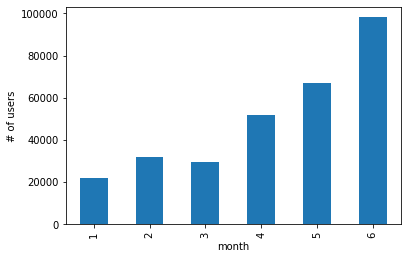

The most common day of week is: Tuesday


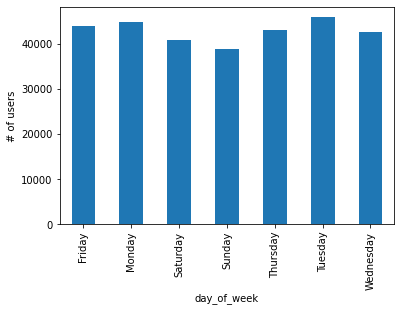

The most common start hour is: 17


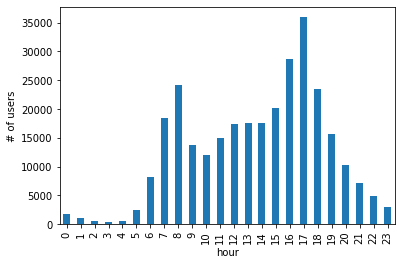

----------------------------------------

(The Most Popular Stations and Trip)

The most popular start station is: Streeter Dr & Grand Ave
The most popular end station is: Streeter Dr & Grand Ave
The most popular trip is: from Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave
----------------------------------------

(Trip Duration)

Total travel time is: 3250 days 21 hours 56 minutes 27 seconds
Average travel time is: 0 days 0 hours 15 minutes 36 seconds
----------------------------------------

(User Stats)

Subscriber    238889
Customer       61110
Dependent          1
Name: User Type, dtype: int64


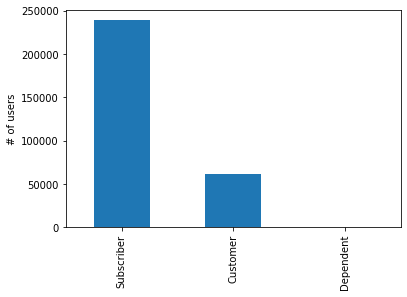




Male      181190
Female     57758
Name: Gender, dtype: int64


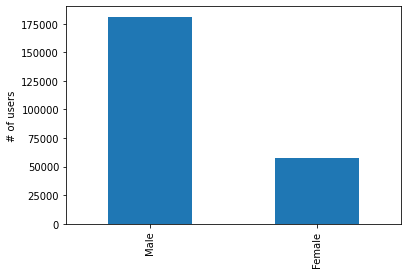




Earliest birth year is: 1899
most recent is: 2016
and most comon birth year is: 1989


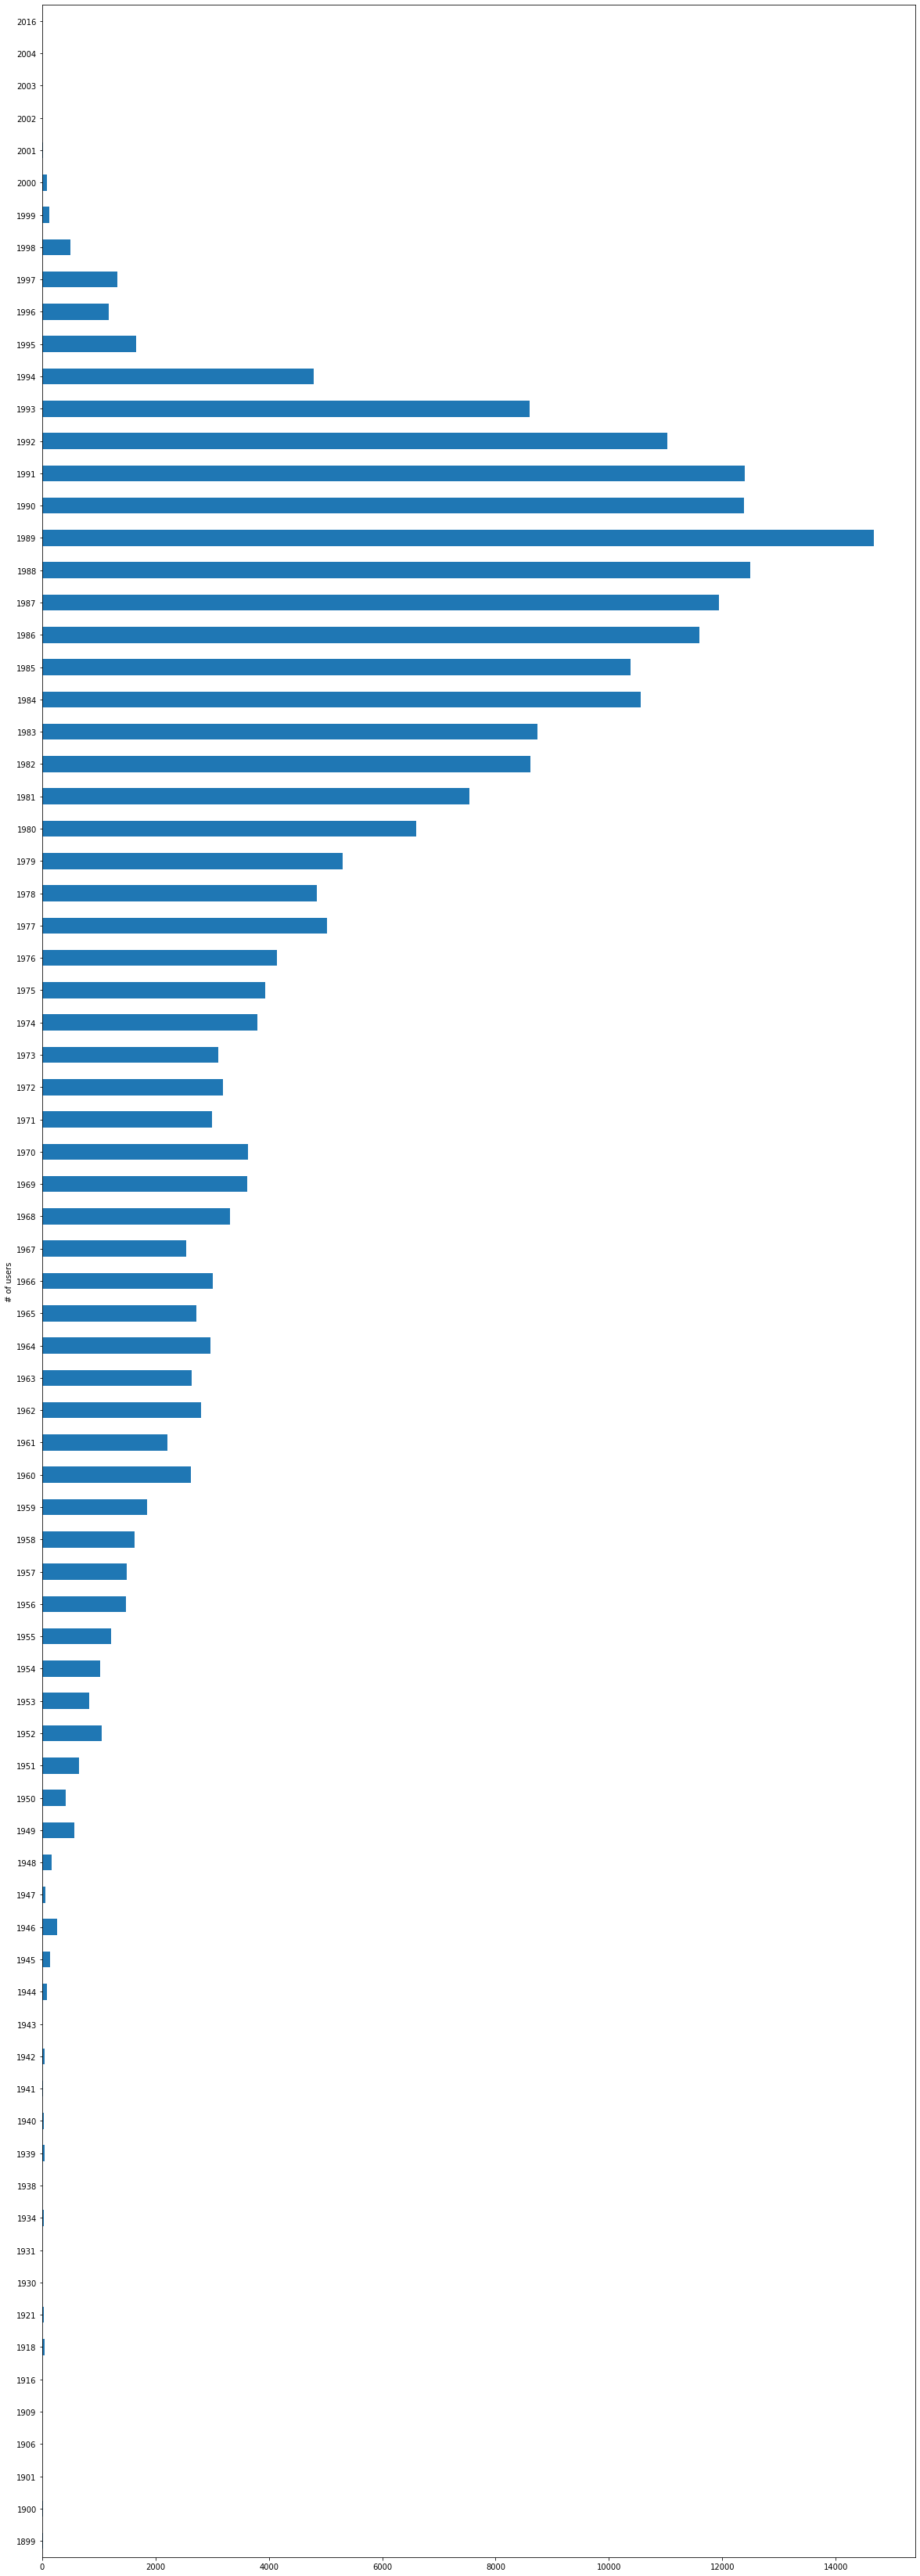

----------------------------------------

Would you like to diplay raw data?
yes
   Unnamed: 0          Start Time             End Time  Trip Duration  \
0     1423854 2017-06-23 15:09:32  2017-06-23 15:14:53            321   
1      955915 2017-05-25 18:19:03  2017-05-25 18:45:53           1610   
2        9031 2017-01-04 08:27:49  2017-01-04 08:34:45            416   
3      304487 2017-03-06 13:49:38  2017-03-06 13:55:28            350   
4       45207 2017-01-17 14:53:07  2017-01-17 15:02:01            534   

                   Start Station                   End Station   User Type  \
0           Wood St & Hubbard St       Damen Ave & Chicago Ave  Subscriber   
1            Theater on the Lake  Sheffield Ave & Waveland Ave  Subscriber   
2             May St & Taylor St           Wood St & Taylor St  Subscriber   
3  Christiana Ave & Lawrence Ave  St. Louis Ave & Balmoral Ave  Subscriber   
4         Clark St & Randolph St  Desplaines St & Jackson Blvd  Subscriber   

   Gender  

In [ ]:
if __name__ == "__main__":
    main()